<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_Stuff/blob/main/trade_data_exim_1988_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

In [2]:
trade = pd.read_csv("/content/drive/MyDrive/Trade/comtrade.csv")

In [3]:
trade.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2017,2017,2017,0,0,1,Import,699,India,...,0.0,NaN,NaN,NaN,NaN,NaN,444052353836,NaN,NaN,4
1,H5,2017,2017,2017,0,0,2,Export,699,India,...,0.0,NaN,NaN,NaN,0.0,NaN,294364490162,NaN,NaN,4
2,H5,2018,2018,2018,0,0,1,Import,699,India,...,0.0,NaN,NaN,NaN,NaN,NaN,507615733027,NaN,NaN,4
3,H5,2018,2018,2018,0,0,2,Export,699,India,...,0.0,NaN,NaN,NaN,0.0,NaN,322492099897,NaN,NaN,4
4,H5,2019,2019,2019,0,0,1,Import,699,India,...,0.0,NaN,NaN,NaN,NaN,NaN,478883729111,NaN,NaN,4


In [5]:
df_trade = trade[["Year", "Trade Flow", "Trade Value (US$)"]]

In [6]:
df_trade.head()

,Year,Trade Flow,Trade Value (US$)
0,2017,Import,444052353836
1,2017,Export,294364490162
2,2018,Import,507615733027
3,2018,Export,322492099897
4,2019,Import,478883729111


In [39]:
df_imports = df_trade.loc[df_trade["Trade Flow"] == "Import"]
df_exports = df_trade.loc[df_trade["Trade Flow"] == "Export"]

In [40]:
df_imports = df_imports.sort_values(by="Year")
df_exports = df_exports.sort_values(by="Year")

In [41]:
df_exports['Exports(USD_Billions)'] = np.round(df_exports['Trade Value (US$)']/1000000000, 1)
df_imports['Imports(USD_Billions)'] = np.round(df_imports['Trade Value (US$)']/1000000000, 1)

In [42]:
df_final = df_exports.merge(df_imports, on="Year")

In [43]:
df_final.head()

,Year,Trade Flow_x,Trade Value (US$)_x,Exports(USD_Billions),Trade Flow_y,Trade Value (US$)_y,Imports(USD_Billions)
0,1988,Export,13872437248,13.9,Import,19350896640,19.4
1,1989,Export,17045031936,17.0,Import,21718194176,21.7
2,1990,Export,17940183040,17.9,Import,23799150592,23.8
3,1991,Export,17899886592,17.9,Import,19509415936,19.5
4,1992,Export,20711291014,20.7,Import,24452408029,24.5


In [44]:
df_final = df_final[["Year", "Exports(USD_Billions)", "Imports(USD_Billions)"]]

In [45]:
df_final.head()

,Year,Exports(USD_Billions),Imports(USD_Billions)
0,1988,13.9,19.4
1,1989,17.0,21.7
2,1990,17.9,23.8
3,1991,17.9,19.5
4,1992,20.7,24.5


In [50]:
df_final = df_final.set_index("Year")

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,8)})

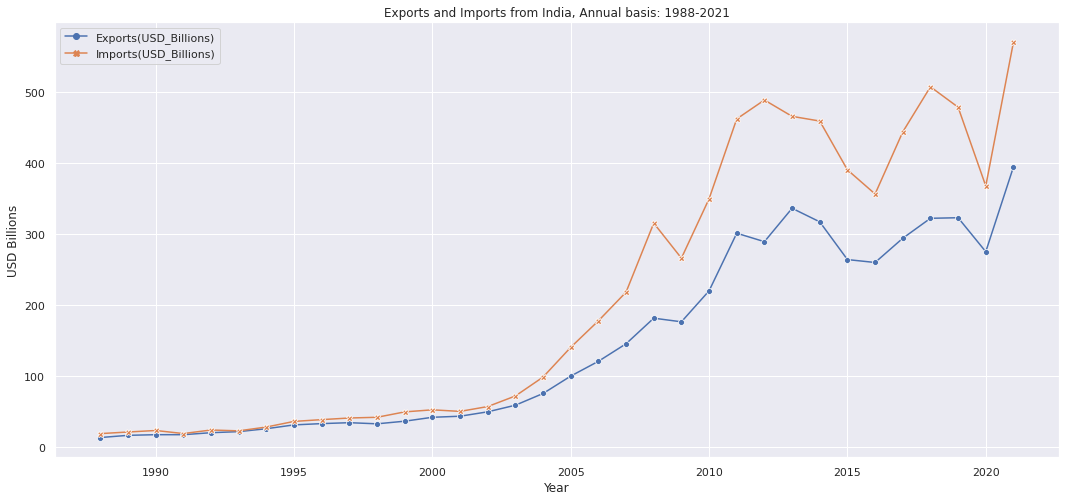

In [69]:
ax = sns.lineplot(data=df_final, markers=True, dashes=False)
ax.set(ylabel='USD Billions', title='Exports and Imports from India, Annual basis: 1988-2021')
plt.savefig("/content/drive/MyDrive/Trade/eximTrade", format='png', dpi=300, bbox_inches='tight')
plt.show()
